# Case Study - Telefonica Retail GmbH

Telekom vs Vodafone Reviews

__Done by:__ Konstantin Vachnadze

<hr>

## Outline

### README: installing virtual environment
### 1. Read Datasets, check Format
### 2. Clean, compare all-time ratings
### 3. Descriptive analysis of Comment column
### 4. Topic Modeling
### 5. Simple Sentiment model (binary ML classification)
### 6. Conclusions

<hr>

## README: installing virtual environment

Create conda environment from Terminal using yml file provided:
```shell script
conda env create -f environment.yml
```

Activate conda environment
```shell script
conda activate caseenv
```

Add environment to the jupyter notebook kernel list
```shell script
python -m ipykernel install --user --name=caseenv
```

## 1. Read Datasets, check Format

In [1]:
# import necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# read datasets
df_telekom = pd.read_csv("Telekom.csv")
df_vodafone = pd.read_csv("vodafone.csv")

In [3]:
df_telekom.head()

,id,City,Address,Latitude,Longitude,Review_Date,Review_rating,Review_period,Comment,runnedDate
0,fea9be23-78db-5091-bbdd-85a05814f345,Lohne,Lindenstr. 121 49393 Lohne,52.67533,8.25465,01/06/2022,5 stars,a year ago,جيد جدا,14/06/2023
1,6f1a5dd1-f357-5419-99a8-160098a190b0,Melle,Weststr. 15 49324 Melle,52.20677,8.33530,01/06/2022,5 stars,a year ago,NaN,14/06/2023
2,1d1e9b17-a14a-5ea4-a1f9-484ab2678363,Saarlouis,St.-Avolder-Str. 38 66740 Saarlouis,49.28829,6.73215,01/06/2022,5 stars,a year ago,Ich war im Januar hier für einen neuen Vertrag...,14/06/2023
3,c246b3e5-8f52-5878-83ba-608141c5240e,Saarlouis,St.-Avolder-Str. 38 66740 Saarlouis,49.28829,6.73215,01/06/2022,5 stars,a year ago,Freundliche und sehr kompetente Beratung.,14/06/2023
4,b82ed1ed-949e-56de-9af5-e8265ea4f277,Saarlouis,St.-Avolder-Str. 38 66740 Saarlouis,49.28829,6.73215,01/06/2022,5 stars,a year ago,Super Team 🙏 …,14/06/2023


In [4]:
df_vodafone.head()

,id,City,Address,Latitude,Longitude,Review_Date,Review_rating,Review_period,Comment,runnedDate
0,82998057-4677-5742-b24a-65dde7c9dfab,Alzey,Roßmarkt 8,49.784905,8.193872,01/06/2021,1 star,2 years ago,Unfreundlich und arrogant,14/06/2023
1,b67917c4-cb79-5284-b3cf-8529286371c8,Alzey,Roßmarkt 8,49.784905,8.193872,01/06/2022,1 star,a year ago,NaN,14/06/2023
2,29c75557-2132-54b4-b4fc-c7d2bc3668d0,Alzey,Roßmarkt 8,49.784905,8.193872,01/06/2022,1 star,a year ago,NaN,14/06/2023
3,b40a5ca7-31ef-5336-bc3c-1ce6debe9d2e,Alzey,Roßmarkt 8,49.784905,8.193872,01/06/2018,2 stars,5 years ago,Leider. Nicht gut,14/06/2023
4,34b8ecd3-09cc-53a8-bcf5-da26bf974d02,Alzey,Roßmarkt 8,49.784905,8.193872,01/06/2021,2 stars,2 years ago,Unfreundlich und unerfahrung,14/06/2023


In [5]:
df_telekom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40738 entries, 0 to 40737
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40738 non-null  object 
 1   City           40738 non-null  object 
 2   Address        40738 non-null  object 
 3   Latitude       40738 non-null  float64
 4   Longitude      40738 non-null  float64
 5   Review_Date    40738 non-null  object 
 6   Review_rating  40738 non-null  object 
 7   Review_period  40738 non-null  object 
 8   Comment        24582 non-null  object 
 9   runnedDate     40738 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.1+ MB


In [6]:
df_vodafone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39592 entries, 0 to 39591
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             39592 non-null  object 
 1   City           39592 non-null  object 
 2   Address        39592 non-null  object 
 3   Latitude       39592 non-null  float64
 4   Longitude      39592 non-null  float64
 5   Review_Date    39592 non-null  object 
 6   Review_rating  39592 non-null  object 
 7   Review_period  39592 non-null  object 
 8   Comment        27812 non-null  object 
 9   runnedDate     39592 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.0+ MB


In [130]:
df_telekom["City"].value_counts()

City
Dessau-Roßlau             977
Münster                   771
Freiburg                  763
Siegburg                  664
Lüneburg                  656
Heide                     631
Nordhausen                597
Quedlinburg               564
Wittlich                  531
Mayen                     515
Berlin                    483
Singen                    458
Pfaffenhofen              456
Hamburg                   447
Schrobenhausen            440
Zeitz                     423
Rheinbach                 396
Bergisch Gladbach         390
Marktredwitz              378
Bochum                    375
Kaufbeuren                370
Dresden                   364
Garmisch-Partenkirchen    340
Lübbecke                  334
Neuss                     334
Leutkirch                 332
Bielefeld                 328
Dinslaken                 327
Brandenburg               326
Memmingen                 325
Göttingen                 322
Leuna                     316
Sonneberg                 314
Jena 

In [131]:
df_vodafone["City"].value_counts()

City
Berlin                         2576
Hamburg                        1236
Braunschweig                    973
München                         816
Duisburg                        767
Stuttgart                       760
Frankfurt                       723
Ratingen                        659
Potsdam                         646
Hannover                        634
Eckernförde                     570
Heide                           569
Kiel                            553
Nürnberg                        551
Reutlingen                      534
Erfurt                          490
Schwalmstadt                    484
Düsseldorf                      458
Leipzig                         456
Gotha                           455
Kaltenkirchen                   430
Flensburg                       430
Kappeln                         429
Nordhorn                        427
Leer                            404
Hennef                          403
Hanau                           398
Göttingen              

## 2. Clean, compare all-time ratings

In [7]:
# Extract integer assuming all review ratings have same format - starting with integer
def extract_rating_as_int(df: pd.DataFrame):
    df["rating_cleaned"] = df["Review_rating"].str.extract('(^\d*)')
    # this will cause error in case we have bad quality data, but let's try it out
    df["rating_cleaned"] = df["rating_cleaned"].astype(int)
    return

In [8]:
extract_rating_as_int(df_telekom)
extract_rating_as_int(df_vodafone)

In [9]:
df_telekom.tail()

,id,City,Address,Latitude,Longitude,Review_Date,Review_rating,Review_period,Comment,runnedDate,rating_cleaned
40733,45709873-8620-5020-ba41-1a07914c494a,Hof,Oberes Tor 5 95028 Hof,50.3189,11.91657,01/06/2021,5 stars,2 years ago,Positiv,13/06/2023,5
40734,becb442a-f147-573c-af0a-843c6a8bce3d,Hof,Oberes Tor 5 95028 Hof,50.3189,11.91657,01/06/2021,5 stars,2 years ago,NaN,13/06/2023,5
40735,1ee1da6c-4309-571e-ae98-1ec5f59ff1ad,Hof,Oberes Tor 5 95028 Hof,50.3189,11.91657,01/06/2021,5 stars,2 years ago,NaN,13/06/2023,5
40736,ebd1eca3-cac7-5d80-bfb7-bf8134557b6b,Hof,Oberes Tor 5 95028 Hof,50.3189,11.91657,01/06/2021,5 stars,2 years ago,NaN,13/06/2023,5
40737,b181b117-ebd6-5a89-b771-8ba6eeb03198,Hof,Oberes Tor 5 95028 Hof,50.3189,11.91657,01/06/2021,5 stars,2 years ago,NaN,13/06/2023,5


In [10]:
df_telekom["rating_cleaned"].value_counts()

rating_cleaned
5    31931
4     3349
1     3111
3     1497
2      850
Name: count, dtype: int64

In [11]:
df_vodafone["rating_cleaned"].value_counts()

rating_cleaned
5    32338
1     3846
4     1888
3      916
2      604
Name: count, dtype: int64

<Axes: xlabel='rating_cleaned'>

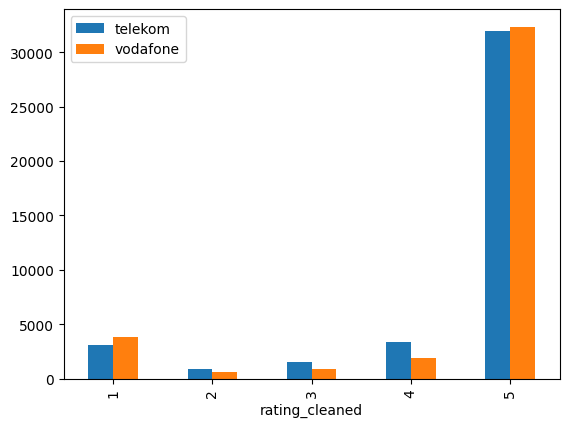

In [12]:
# Plot all-time ratings together
df_combined = pd.concat([df_telekom, df_vodafone], keys=['telekom', 'vodafone'])
df_combined.groupby(level=0)["rating_cleaned"].value_counts().unstack().transpose().plot(kind="bar")

### Prepare date in date format and useful date-info columns

In [13]:
def add_date_cols(df: pd.DataFrame):
    df["datetime"] = pd.to_datetime(df["Review_Date"], format='%d/%m/%Y')
    df["Month_num"] = df.datetime.dt.month
    df["Year_num"] = df.datetime.dt.year
    df['Year-Month'] = df_telekom['datetime'].dt.strftime('%Y-%m')
    return

In [14]:
add_date_cols(df_telekom)
add_date_cols(df_vodafone)

In [15]:
df_telekom.head()

,id,City,Address,Latitude,Longitude,Review_Date,Review_rating,Review_period,Comment,runnedDate,rating_cleaned,datetime,Month_num,Year_num,Year-Month
0,fea9be23-78db-5091-bbdd-85a05814f345,Lohne,Lindenstr. 121 49393 Lohne,52.67533,8.25465,01/06/2022,5 stars,a year ago,جيد جدا,14/06/2023,5,2022-06-01,6,2022,2022-06
1,6f1a5dd1-f357-5419-99a8-160098a190b0,Melle,Weststr. 15 49324 Melle,52.20677,8.33530,01/06/2022,5 stars,a year ago,NaN,14/06/2023,5,2022-06-01,6,2022,2022-06
2,1d1e9b17-a14a-5ea4-a1f9-484ab2678363,Saarlouis,St.-Avolder-Str. 38 66740 Saarlouis,49.28829,6.73215,01/06/2022,5 stars,a year ago,Ich war im Januar hier für einen neuen Vertrag...,14/06/2023,5,2022-06-01,6,2022,2022-06
3,c246b3e5-8f52-5878-83ba-608141c5240e,Saarlouis,St.-Avolder-Str. 38 66740 Saarlouis,49.28829,6.73215,01/06/2022,5 stars,a year ago,Freundliche und sehr kompetente Beratung.,14/06/2023,5,2022-06-01,6,2022,2022-06
4,b82ed1ed-949e-56de-9af5-e8265ea4f277,Saarlouis,St.-Avolder-Str. 38 66740 Saarlouis,49.28829,6.73215,01/06/2022,5 stars,a year ago,Super Team 🙏 …,14/06/2023,5,2022-06-01,6,2022,2022-06


### Check which dates available in both datasets - use intersection for comparison reasons

In [16]:
df_vodafone[["datetime","rating_cleaned"]].groupby('datetime').count()

,rating_cleaned
datetime,
2011-06-01,3
2012-06-01,3
2013-06-01,21
2014-06-01,24
2015-06-01,75
2016-06-01,229
2017-06-01,868
2018-06-01,5647
2019-06-01,8237


In [17]:
dates_vodafone = df_vodafone["Review_Date"].unique().tolist()
dates_telekom = df_telekom["Review_Date"].unique().tolist()

#### Dates Vodafone has and Telekom not

In [18]:
dates_not_in_telekom = [el for el in dates_vodafone if el not in dates_telekom]
dates_not_in_telekom

['15/06/2023']

#### Dates Telekom has and Vodafone not

In [19]:
dates_not_in_vodafone = [el for el in dates_telekom if el not in dates_vodafone]
dates_not_in_vodafone

[]

#### Drop date not found in telekom

In [20]:
# drop date not in telekom
df_vodafone = df_vodafone[df_vodafone["Review_Date"] != "15/06/2023"].copy()

#### Count reviews per Month - merge in one dataframe

In [21]:
def prepare_review_counts(df: pd.DataFrame) -> pd.DataFrame:
    # aggregate - count ratings
    df_counts = df.groupby(['Year-Month', 'rating_cleaned'])['rating_cleaned'].count().unstack('rating_cleaned')
    # clean frame from grouped pivot levels
    df_counts = pd.DataFrame(df_counts.to_records())
    # fillna
    df_counts = df_counts.fillna(0)
    
    # sum up non 5 ratings
    df_counts["non5"] = df_counts["1"] + df_counts["2"] + df_counts["3"] + df_counts["4"]
    
    # add relative ratios for 5 and non-5 ratings
    df_counts["5ratio"] = df_counts["5"] / (df_counts["5"] + df_counts["non5"])
    df_counts["non5ratio"] = df_counts["non5"] / (df_counts["5"] + df_counts["non5"])
    return df_counts

In [22]:
df_telekom_counts = prepare_review_counts(df_telekom)
df_vodafone_counts = prepare_review_counts(df_vodafone)

In [23]:
df_vodafone_counts

,Year-Month,1,2,3,4,5,non5,5ratio,non5ratio
0,2011-06,0.0,0.0,0.0,0.0,3.0,0.0,1.000000,0.000000
1,2012-06,0.0,1.0,0.0,0.0,1.0,1.0,0.500000,0.500000
2,2013-06,2.0,0.0,0.0,0.0,3.0,2.0,0.600000,0.400000
3,2014-06,0.0,0.0,2.0,0.0,7.0,2.0,0.777778,0.222222
4,2015-06,4.0,1.0,3.0,0.0,35.0,8.0,0.813953,0.186047
5,2016-06,23.0,0.0,3.0,7.0,120.0,33.0,0.784314,0.215686
6,2017-06,95.0,15.0,29.0,62.0,718.0,201.0,0.781284,0.218716
7,2018-06,227.0,42.0,66.0,136.0,1937.0,471.0,0.804402,0.195598
8,2019-06,429.0,86.0,137.0,271.0,4986.0,923.0,0.843798,0.156202
9,2020-06,633.0,84.0,141.0,302.0,6015.0,1160.0,0.838328,0.161672


In [24]:
df_merged_counts = df_telekom_counts.merge(df_vodafone_counts, how="inner", on="Year-Month", suffixes=('_tkom', '_vfon'))

#### 5-ratings in-time comparison

<Axes: xlabel='Year-Month'>

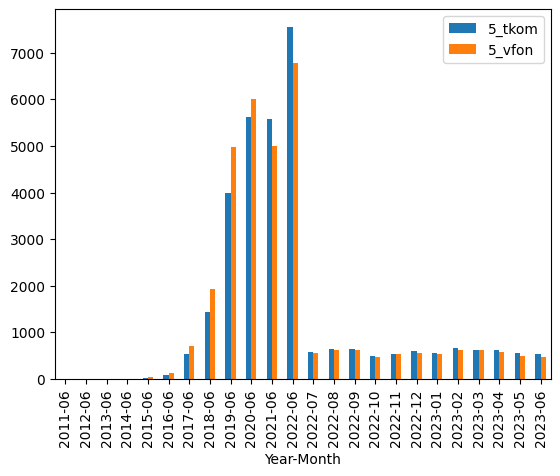

In [25]:
df_merged_counts[["Year-Month", "5_tkom", "5_vfon"]].plot(x='Year-Month', kind='bar')

- Dataset seems to be cropped after June 2022
- We see that Vodafone had more 5 star rated comments before 2021
- June 2021 and June 2022 telekom had more 5 star rated comments
- Starting from July 2022 we have data per Month, where telekom was slightly better

#### non5-ratings in-time comparison

<Axes: xlabel='Year-Month'>

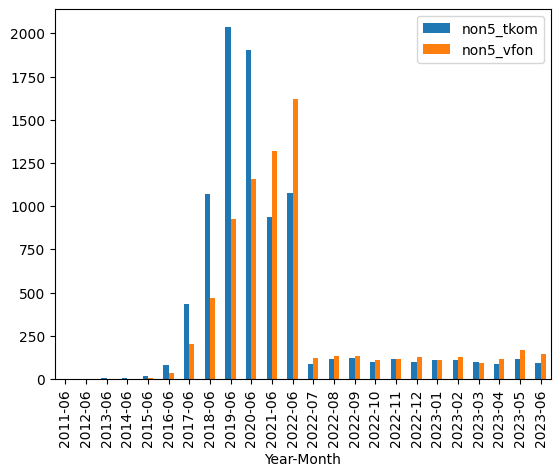

In [26]:
df_merged_counts[["Year-Month", "non5_tkom", "non5_vfon"]].plot(x='Year-Month', kind='bar')

- For non-5 star ratings we see the same picture as for 5 star ratings
- till 2021 Telekom had many non-5 rated comments

#### 1 rating comparison

<Axes: xlabel='Year-Month'>

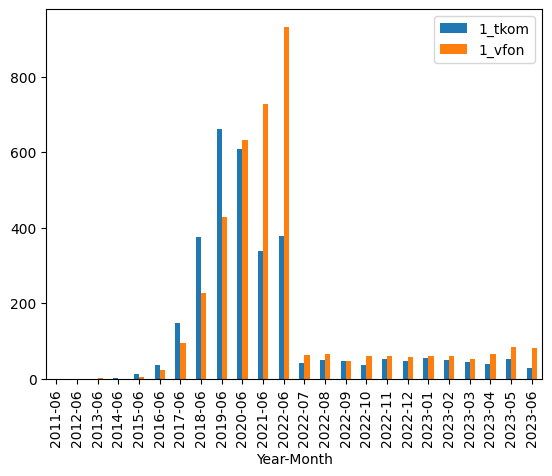

In [27]:
df_merged_counts[["Year-Month", "1_tkom", "1_vfon"]].plot(x='Year-Month', kind='bar')

- 1 star rated comments: vodafone had more 1star rated comments since 2020
- Especially 2021, 2022 and April-June of 2023 vodafone had much more 1stars than telekom

#### As absolute numbers differ a lot after June 2022, let's compare relative ratios

<Axes: xlabel='Year-Month'>

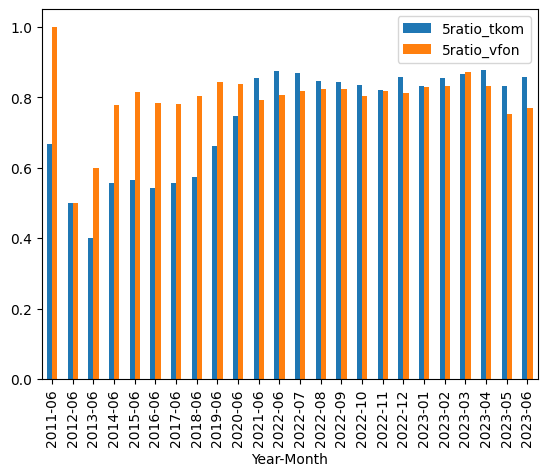

In [28]:
df_merged_counts[["Year-Month", "5ratio_tkom", "5ratio_vfon"]].plot(x='Year-Month', kind='bar')

- Similar pattern: before 2021 vodafone had better ratings
- By checking the ration of 5-star ratings from all ratings we see that vodafone had similar performance at the beginning of 2023

#### ratio non5 ratings comparison

<Axes: xlabel='Year-Month'>

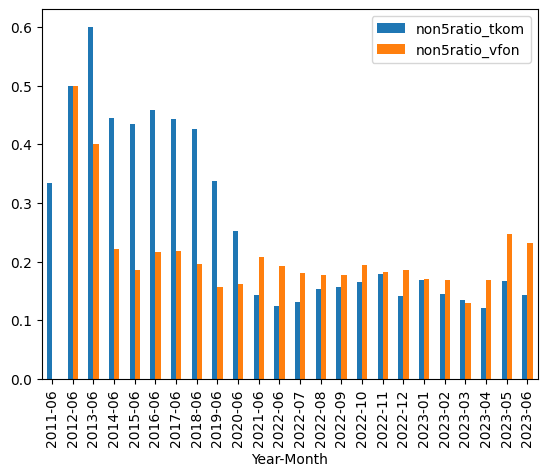

In [29]:
df_merged_counts[["Year-Month", "non5ratio_tkom", "non5ratio_vfon"]].plot(x='Year-Month', kind='bar')

## 3. Descriptive analysis of Comment column


#### Drop NA Comments

In [30]:
df_telekom_comments = df_telekom[df_telekom["Comment"].notna()].copy()
df_vodafone_comments = df_vodafone[df_vodafone["Comment"].notna()].copy()
print(len(df_telekom_comments))
print(len(df_vodafone_comments))

24582
27754


#### Load german stopwords

In [31]:
# german stopwords - exclude from Counter
from stop_words import get_stop_words
stopwords = set(get_stop_words('german'))

In [32]:
stopwords

{'aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'das',
 'dass',
 'dasselbe',
 'dazu',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'dem',
 'demselben',
 'den',
 'denn',
 'denselben',
 'der',
 'derer',
 'derselbe',
 'derselben',
 'des',
 'desselben',
 'dessen',
 'dich',
 'die',
 'dies',
 'diese',
 'dieselbe',
 'dieselben',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'dir',
 'doch',
 'dort',
 'du',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'es',
 'etwas',
 'euch',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 'hier',
 'hin',
 'h

#### Create function to check most common words per rating

In [33]:
import re
from typing import Optional
from collections import Counter

token_pattern=r"\b\w\w+\b"

def most_common_tokens(df: pd.DataFrame, rating: Optional[int] = None, n_common: int = 20) -> list:
    if rating is None:
        li_comments = df['Comment'].tolist()
    else:
        li_comments = df.loc[df["rating_cleaned"] == rating, 'Comment'].tolist()

    text_comments = " ".join(li_comments)
    tokens = re.findall(token_pattern, text_comments)
    tokens = [word for word in tokens if word.lower() not in stopwords]
    return Counter(tokens).most_common(n_common)

In [34]:
most_common_tokens(df_telekom_comments, rating=5)

[('Beratung', 7369),
 ('Service', 3379),
 ('Super', 2884),
 ('freundlich', 2327),
 ('Mitarbeiter', 2266),
 ('immer', 2140),
 ('super', 1852),
 ('gut', 1829),
 ('kompetente', 1802),
 ('gute', 1769),
 ('zufrieden', 1713),
 ('Shop', 1689),
 ('beraten', 1636),
 ('kompetent', 1518),
 ('Top', 1502),
 ('wurde', 1475),
 ('freundliche', 1471),
 ('gerne', 1445),
 ('Dank', 1409),
 ('empfehlen', 1331)]

In [35]:
most_common_tokens(df_vodafone_comments, rating=5)

[('Beratung', 7499),
 ('Service', 4377),
 ('Super', 3754),
 ('Shop', 3104),
 ('super', 2860),
 ('zufrieden', 2706),
 ('Mitarbeiter', 2675),
 ('immer', 2341),
 ('Vodafone', 2238),
 ('Danke', 2234),
 ('Dank', 2187),
 ('freundlich', 2146),
 ('Herr', 2144),
 ('gut', 2062),
 ('wurde', 2015),
 ('beraten', 1880),
 ('Top', 1853),
 ('empfehlen', 1850),
 ('gute', 1846),
 ('gerne', 1768)]

In [36]:
most_common_tokens(df_telekom_comments, rating=1)

[('Telekom', 754),
 ('wurde', 559),
 ('Shop', 486),
 ('Mitarbeiter', 446),
 ('Vertrag', 371),
 ('Laden', 361),
 ('Kunden', 322),
 ('Beratung', 310),
 ('mehr', 296),
 ('mal', 247),
 ('Service', 246),
 ('Handy', 195),
 ('unfreundlich', 191),
 ('geht', 169),
 ('schon', 169),
 ('Kunde', 159),
 ('einfach', 154),
 ('Personal', 152),
 ('Verkäufer', 146),
 ('ja', 146)]

In [37]:
most_common_tokens(df_vodafone_comments, rating=1)

[('Vodafone', 1208),
 ('Shop', 886),
 ('wurde', 833),
 ('Vertrag', 764),
 ('Mitarbeiter', 652),
 ('the', 548),
 ('to', 540),
 ('Laden', 445),
 ('Kunden', 407),
 ('and', 406),
 ('mehr', 392),
 ('mal', 342),
 ('Service', 331),
 ('Handy', 325),
 ('nie', 287),
 ('Verträge', 284),
 ('Beratung', 272),
 ('geht', 251),
 ('einfach', 249),
 ('immer', 240)]

- words looking very similar
- One can say that telekom has in general more 5-rated frequent words about the staff (Mitarbeiter, freundlich, kompetence), but word "unfreundlich" is common for telekom 1 stars
- More english in 1 star rated comments for vodafone

#### Check most common words using WordCloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=2000,
        max_font_size=30, 
        scale=2,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

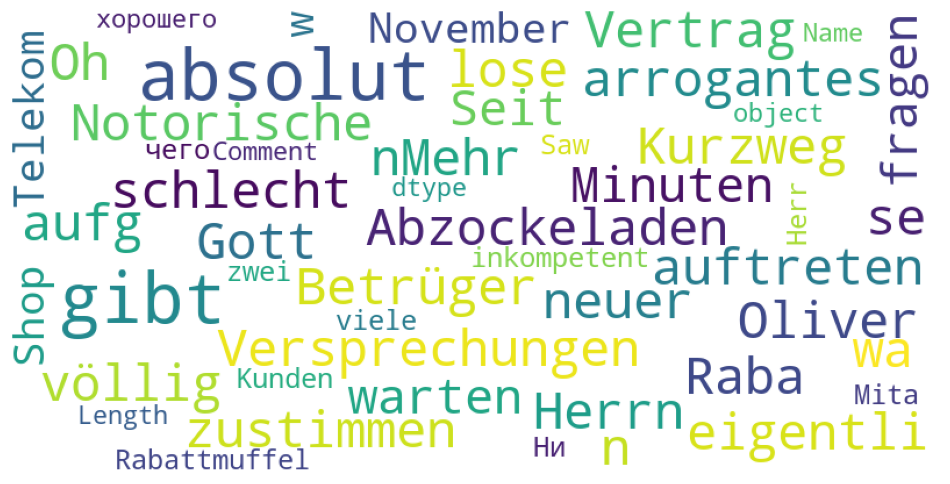

In [39]:
show_wordcloud(df_telekom_comments.loc[df_telekom_comments["rating_cleaned"] == 1,'Comment'])

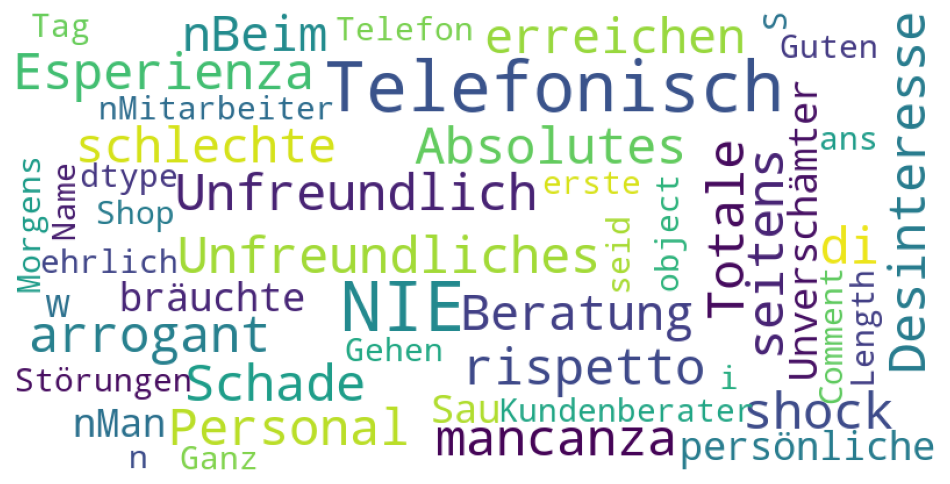

In [40]:
show_wordcloud(df_vodafone_comments.loc[df_vodafone_comments["rating_cleaned"] == 1,'Comment'])

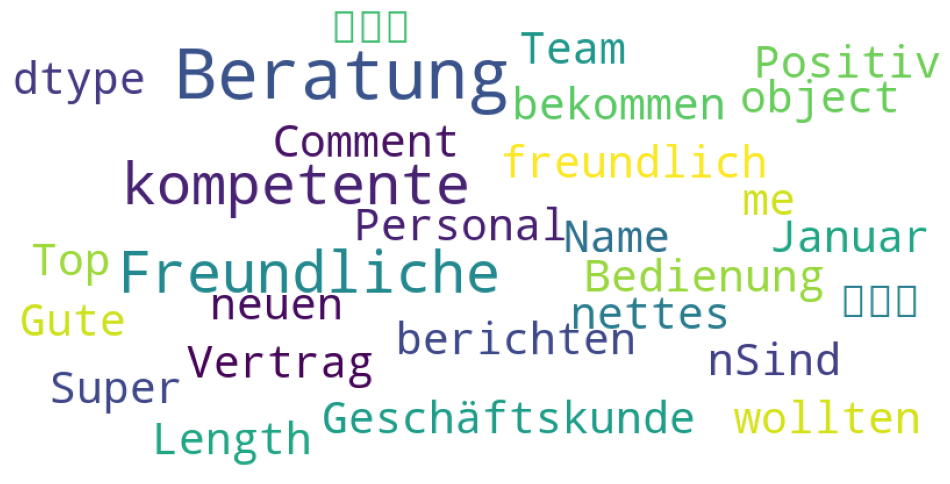

In [41]:
show_wordcloud(df_telekom_comments.loc[df_telekom_comments["rating_cleaned"] == 5,'Comment'])

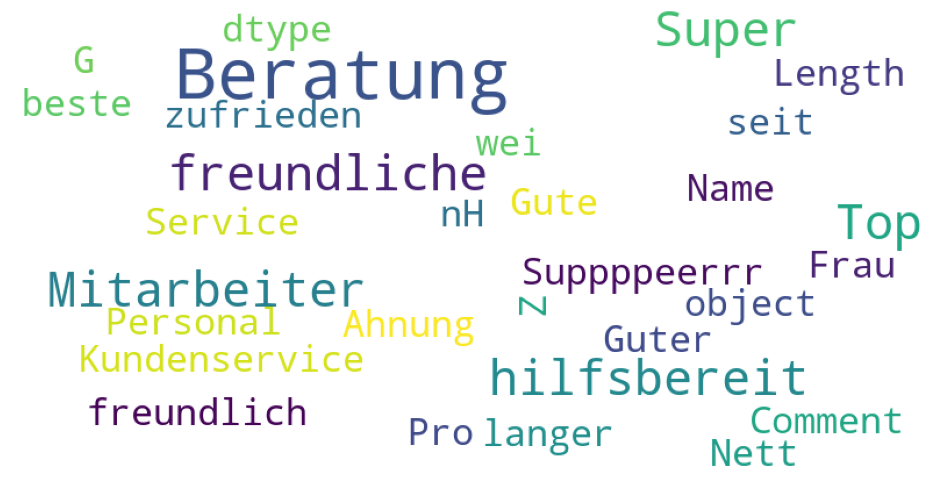

In [42]:
show_wordcloud(df_vodafone_comments.loc[df_vodafone_comments["rating_cleaned"] == 5,'Comment'])

- Comments look very similar for both companies
- It is obvious that we have to invest time for preprocessing as comments are very noisy (language, bad data quality)

### Preprocess (tokenize and stemm comments)

In [43]:
import re
import spacy
from nltk.stem.snowball import SnowballStemmer
nlp = spacy.load('de_core_news_sm')
stemmer = SnowballStemmer("german")

stopwords.add("dtype")
        
def clean_text(text: str, all_lowercase: bool=True) -> str:
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    doc = nlp(text)
    #lemmas = [token.lemma_ for token in doc if token.text.lower() not in stopwords]
    
    words_filtered = [stemmer.stem(token.text) for token in doc if token.text.lower() not in stopwords]
    
    if all_lowercase:
        words_filtered = [x.lower() for x in words_filtered]
    
    text_clean = " ".join(words_filtered)
    return text_clean.strip()

In [44]:
clean_text("Freundliche und sehr kompetente Beratung.")

'freundlich kompetent berat'

- Exclude sehr from stopwords?
- Stemming seems to be more useful for our task than lemmatization, to avoid normalization of words like gut, best, der beste

In [45]:
from tqdm import tqdm
tqdm.pandas()
df_telekom_comments["comments_cleaned"] = df_telekom_comments["Comment"].progress_apply(clean_text)

100%|████████████████████████████████████| 24582/24582 [02:35<00:00, 157.84it/s]


In [46]:
df_vodafone_comments["comments_cleaned"] = df_vodafone_comments["Comment"].progress_apply(clean_text)

100%|████████████████████████████████████| 27754/27754 [03:00<00:00, 154.16it/s]


In [47]:
print(len(df_telekom_comments))
print(len(df_vodafone_comments))

24582
27754


In [48]:
# drop empty values
df_telekom_comments = df_telekom_comments[df_telekom_comments["comments_cleaned"] != ""].copy()
df_vodafone_comments = df_vodafone_comments[df_vodafone_comments["comments_cleaned"] != ""].copy()

In [49]:
print(len(df_telekom_comments))
print(len(df_vodafone_comments))

24227
27500


In [50]:
df_telekom_comments[["Comment", "comments_cleaned"]]

,Comment,comments_cleaned
2,Ich war im Januar hier für einen neuen Vertrag...,januar neu vertrag passend handy wurd schnell ...
3,Freundliche und sehr kompetente Beratung.,freundlich kompetent berat
4,Super Team 🙏 …,sup team
5,"Als Geschäftskunde kann ich berichten, dass me...",geschaftskund bericht bedurfnis voll ganz erfu...
6,"Wenn die Telekom eins nicht hat, dann ist das ...",telekom ein gut ruf sach kundenservic best zuk...
...,...,...
40729,Gute Beratung und sehr freundlich,gut berat freundlich
40730,Wir haben das bekommen was wir wollten!\nSind ...,bekomm wollt glucklich telefon
40731,Sehr freundliche und kompetente Bedienung,freundlich kompetent bedien
40732,Top Beratung und sehr nettes Personal,top berat nett personal


#### Visualize stemmed word frequency

In [51]:
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot
from bokeh.io import output_notebook
output_notebook()

from hvplot import pandas

#hv.extension("bokeh")

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

Loading BokehJS ...

In [52]:
from bokeh.models import NumeralTickFormatter
import hvplot
import holoviews as hv

# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_telekom_comments["comments_cleaned"]).split()).value_counts()
word_freq[1:40].rename("Telekom most common words in comments").hvplot.bar(
    rot=45
).opts(width=1000, height=400, yformatter=NumeralTickFormatter(format="0,0"))




/Users/konstantin.vachnadze/anaconda3/envs/caseenv-test/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/konstantin.vachnadze/anaconda3/envs/caseenv-test/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/konstantin.vachnadze/anaconda3/envs/caseenv-test/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [index]   (Telekom most common words in comments)

In [53]:
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_vodafone_comments["comments_cleaned"]).split()).value_counts()
word_freq[1:40].rename("Vodafone most common words in comments").hvplot.bar(
    rot=45
).opts(width=1000, height=400, yformatter=NumeralTickFormatter(format="0,0"))


/Users/konstantin.vachnadze/anaconda3/envs/caseenv-test/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/konstantin.vachnadze/anaconda3/envs/caseenv-test/lib/python3.9/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
/Users/konstantin.vachnadze/anaconda3/envs/caseenv-test/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [index]   (Vodafone most common words in comments)

- freundlich and kompetent are top words for telekom, not in vodafone
- But vodafone has super, gut, service in top3
- Otherwise - very similar words
- Can be dataset specific

In [54]:
word_freq[-20:].reset_index(name="freq").hvplot.table()


:Table   [index,freq]

## 4. Topic Modeling


In [56]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# visualization
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint

In [57]:
# Tokenize cleaned data to the list of lists
def get_data_words(df: pd.DataFrame):
    data_words = []
    data = df["comments_cleaned"].values.tolist()
    for sentence in data:
        sentence_tokens = re.findall(token_pattern, sentence)
        data_words.append(sentence_tokens)
    return data_words

In [58]:
def make_data_ngrams(data_words: list, mod: str = "bigram"):
    # Build the bigram or trigram models  
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    # Faster way to get a sentence clubbed as a trigram/bigram
    if mod == "trigram":
        trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
        trigram_mod = gensim.models.phrases.Phraser(trigram)
        # trigram example
        # print(trigram_mod[bigram_mod[data_words[0]]])
        return [trigram_mod[bigram_mod[doc]] for doc in data_words]
    else:
        print(bigram_mod[data_words[0]])
        return [bigram_mod[doc] for doc in data_words]

In [59]:
def get_dict_and_corpus(data_words_ngrams):
    # Create Dictionary 
    id2word = corpora.Dictionary(data_words_ngrams)  
    # Create Corpus 
    texts = data_words_ngrams  
    # Term Document Frequency 
    corpus = [id2word.doc2bow(text) for text in texts]  
    # View frequency - example
    print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])
    return corpus, id2word

In [60]:
data_words_telekom = get_data_words(df_telekom_comments)
print(data_words_telekom[:1])
data_words_vodafone = get_data_words(df_vodafone_comments)
print(data_words_vodafone[:1])

[['januar', 'neu', 'vertrag', 'passend', 'handy', 'wurd', 'schnell', 'weitergeholf', 'berat', 'top', 'bestellt', 'handy', 'binn', 'paar', 'tag', 'rechnungsfrag', 'wurd', 'weitergeholf', 'gern', 'nach', 'vertragsverlanger']]
[['unfreund', 'arrogant']]


In [61]:
# Form Bigrams
telekom_words_ngrams = make_data_ngrams(data_words_telekom)
vodafone_words_ngrams = make_data_ngrams(data_words_vodafone)

['januar', 'neu', 'vertrag', 'passend', 'handy', 'wurd', 'schnell', 'weitergeholf', 'berat', 'top', 'bestellt', 'handy', 'binn', 'paar', 'tag', 'rechnungsfrag', 'wurd', 'weitergeholf', 'gern', 'nach', 'vertragsverlanger']
['unfreund', 'arrogant']


In [62]:
# Get Corpus and Dictionary, view frequency
telekom_corpus, telekom_id2word = get_dict_and_corpus(telekom_words_ngrams)
vodafone_corpus, vodafone_id2word = get_dict_and_corpus(vodafone_words_ngrams)

[[('berat', 1), ('bestellt', 1), ('binn', 1), ('gern', 1), ('handy', 2), ('januar', 1), ('nach', 1), ('neu', 1), ('paar', 1), ('passend', 1), ('rechnungsfrag', 1), ('schnell', 1), ('tag', 1), ('top', 1), ('vertrag', 1), ('vertragsverlanger', 1), ('weitergeholf', 2), ('wurd', 2)]]
[[('arrogant', 1), ('unfreund', 1)]]


#### Train LDA Models

In [63]:
lda_telekom_model = gensim.models.ldamodel.LdaModel(corpus=telekom_corpus,
                                           id2word=telekom_id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
print("Telekom LDA trained")
lda_vodafone_model = gensim.models.ldamodel.LdaModel(corpus=vodafone_corpus,
                                           id2word=vodafone_id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
print("Vodafone LDA trained")


Telekom LDA trained
Vodafone LDA trained


In [64]:
# TELEKOM keyword of topics
pprint(lda_telekom_model.print_topics())
doc_lda_telekom = lda_telekom_model[telekom_corpus]

[(0,
  '0.064*"wurd" + 0.047*"telekom" + 0.043*"shop" + 0.039*"frau" + 0.031*"kund" '
  '+ 0.019*"schon" + 0.017*"handy" + 0.016*"heut" + 0.015*"neu" + '
  '0.015*"lang"'),
 (1,
  '0.024*"kauf" + 0.021*"schlecht" + 0.020*"beim" + 0.017*"zuvorkomm" + '
  '0.014*"gekauft" + 0.013*"frag" + 0.012*"beantwortet" + 0.012*"kurz" + '
  '0.012*"abgeschloss" + 0.011*"minut"'),
 (2,
  '0.127*"berat" + 0.071*"freundlich" + 0.059*"kompetent" + 0.049*"sup" + '
  '0.039*"servic" + 0.038*"imm" + 0.038*"nett" + 0.037*"dank" + '
  '0.031*"mitarbeit" + 0.027*"gern"'),
 (3,
  '0.022*"vertrag" + 0.019*"mehr" + 0.016*"mal" + 0.016*"lad" + '
  '0.014*"verkauf" + 0.013*"telefon" + 0.012*"konnt" + 0.012*"leid" + '
  '0.011*"bekomm" + 0.010*"ort"'),
 (4,
  '0.252*"gut" + 0.044*"best" + 0.022*"unfreund" + 0.020*"bedien" + '
  '0.015*"gross" + 0.014*"erfahr" + 0.014*"voll" + 0.011*"fachlich" + '
  '0.010*"erklar" + 0.010*"klass"')]


In [65]:
# VODAFONE keyword of topics
pprint(lda_vodafone_model.print_topics())
doc_lda_vodafone = lda_vodafone_model[vodafone_corpus]

[(0,
  '0.088*"wurd" + 0.028*"zeit" + 0.024*"mal" + 0.021*"leid" + 0.020*"handy" + '
  '0.018*"problem" + 0.017*"konnt" + 0.015*"verkauf" + 0.013*"hotlin" + '
  '0.013*"gemacht"'),
 (1,
  '0.093*"berat" + 0.056*"sup" + 0.056*"gut" + 0.047*"freundlich" + '
  '0.042*"servic" + 0.041*"dank" + 0.036*"nett" + 0.032*"kompetent" + '
  '0.030*"imm" + 0.029*"mitarbeit"'),
 (2,
  '0.049*"vertrag" + 0.031*"lad" + 0.019*"neu" + 0.015*"frau" + 0.014*"nie" + '
  '0.013*"heut" + 0.013*"telefon" + 0.013*"bekomm" + 0.011*"stern" + '
  '0.009*"dam"'),
 (3,
  '0.077*"shop" + 0.073*"vodafon" + 0.042*"kund" + 0.025*"best" + 0.018*"seit" '
  '+ 0.017*"jahr" + 0.017*"mitarbeit" + 0.015*"unfreund" + 0.014*"schlecht" + '
  '0.013*"mehr"'),
 (4,
  '0.041*"hilf" + 0.032*"and" + 0.029*"empfehlenswert" + 0.026*"the" + '
  '0.024*"to" + 0.015*"klass" + 0.011*"for" + 0.011*"jederzeit" + 0.010*"very" '
  '+ 0.010*"is"')]


In [66]:
# Evaluation
# Compute Perplexity
print('\nTelekom Perplexity: ', lda_telekom_model.log_perplexity(telekom_corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_telekom_model, texts=telekom_words_ngrams, dictionary=telekom_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nTelekom Coherence Score: ', coherence_lda)

print('\nVodafone Perplexity: ', lda_vodafone_model.log_perplexity(vodafone_corpus))  
coherence_model_lda = CoherenceModel(model=lda_vodafone_model, texts=vodafone_words_ngrams, dictionary=vodafone_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nVodafone Coherence Score: ', coherence_lda)


Telekom Perplexity:  -7.203557882913425

Telekom Coherence Score:  0.5372120619375396

Vodafone Perplexity:  -7.222772969421562

Vodafone Coherence Score:  0.6429736181436534


#### TELEKOM Topics

In [67]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_telekom_model, telekom_corpus, telekom_id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.392672  0.050218       1        1  36.619341
3     -0.013272 -0.141101       2        1  23.409169
0     -0.105199 -0.272301       3        1  20.734821
4     -0.140484  0.247310       4        1  10.607605
1     -0.133717  0.115874       5        1   8.629063, topic_info=                   Term          Freq         Total Category  logprob  loglift
47                  gut   6197.000000   6197.000000  Default  30.0000  30.0000
0                 berat  10759.000000  10759.000000  Default  29.0000  29.0000
18           freundlich   6049.000000   6049.000000  Default  28.0000  28.0000
19            kompetent   5032.000000   5032.000000  Default  27.0000  27.0000
17                 wurd   3089.000000   3089.000000  Default  26.0000  26.0000
20                  sup   4134.000000   4134.000000  Default  25.0000  25.0000
127              servic   3334.000000   3334.000000  Default  24.0000  24.0000
36                 shop   2079.000000   2079.000000  Default  23.0000  23.0000
84                  imm   3220.000000   3220.000000  Default  22.0000  22.0000
37              telekom   2430.000000   2430.000000  Default  21.0000  21.0000
87                 nett   3200.000000   3200.000000  Default  20.0000  20.0000
62                 dank   3156.000000   3156.000000  Default  19.0000  19.0000
106                frau   1886.000000   1886.000000  Default  18.0000  18.0000
42                 best   1076.000000   1076.000000  Default  17.0000  17.0000
34                 kund   1501.000000   1501.000000  Default  16.0000  16.0000
3                  gern   2254.000000   2254.000000  Default  15.0000  15.0000
82              zufried   2029.000000   2029.000000  Default  14.0000  14.0000
86            mitarbeit   2919.000000   2919.000000  Default  13.0000  13.0000
13                  top   1772.000000   1772.000000  Default  12.0000  12.0000
14              vertrag   1220.000000   1220.000000  Default  11.0000  11.0000
68                 viel   1768.000000   1768.000000  Default  10.0000  10.0000
11              schnell   1614.000000   1614.000000  Default   9.0000   9.0000
703            personal   1527.000000   1527.000000  Default   8.0000   8.0000
72                 mehr   1046.000000   1046.000000  Default   7.0000   7.0000
284                herr   1494.000000   1494.000000  Default   6.0000   6.0000
397             empfehl   1466.000000   1466.000000  Default   5.0000   5.0000
477               schon    931.000000    931.000000  Default   4.0000   4.0000
598         hilfsbereit   1429.000000   1429.000000  Default   3.0000   3.0000
111                toll   1423.000000   1423.000000  Default   2.0000   2.0000
80                  mal    895.000000    895.000000  Default   1.0000   1.0000
0                 berat  10758.491858  10759.243784   Topic1  -2.0661   1.0045
18           freundlich   6049.226344   6049.975884   Topic1  -2.6419   1.0045
19            kompetent   5031.480206   5032.229099   Topic1  -2.8261   1.0044
20                  sup   4134.173381   4134.919830   Topic1  -3.0225   1.0044
127              servic   3333.399668   3334.149813   Topic1  -3.2378   1.0044
84                  imm   3219.831375   3220.580826   Topic1  -3.2725   1.0044
87                 nett   3199.883335   3200.631865   Topic1  -3.2787   1.0044
62                 dank   3155.452977   3156.204771   Topic1  -3.2926   1.0044
3                  gern   2253.753768   2254.502786   Topic1  -3.6292   1.0043
82              zufried   2029.155929   2029.907359   Topic1  -3.7342   1.0042
13                  top   1772.205957   1772.953471   Topic1  -3.8696   1.0042
68                 viel   1767.644946   1768.398647   Topic1  -3.8721   1.0042
11              schnell   1613.747140   1614.498880   Topic1  -3.9632   1.0041
703            personal   1526.907265   1527.659928   Topic1  -4.0185   1.0041
284                herr 

#### VODAFONE Topics

In [68]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_vodafone_model, vodafone_corpus, vodafone_id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.390942  0.080808       1        1  39.004214
2      0.057143 -0.108716       2        1  18.022003
3      0.052129 -0.303884       3        1  17.684043
0      0.190199  0.235955       4        1  14.900830
4      0.091470  0.095836       5        1  10.388909, topic_info=                   Term          Freq         Total Category  logprob  loglift
24                berat  11079.000000  11079.000000  Default  30.0000  30.0000
126                wurd   3999.000000   3999.000000  Default  29.0000  29.0000
67                 shop   4171.000000   4171.000000  Default  28.0000  28.0000
123             vodafon   3955.000000   3955.000000  Default  27.0000  27.0000
27                  sup   6665.000000   6665.000000  Default  26.0000  26.0000
2                   gut   6648.000000   6648.000000  Default  25.0000  25.0000
25           freundlich   5536.000000   5536.000000  Default  24.0000  24.0000
55                 dank   4905.000000   4905.000000  Default  23.0000  23.0000
36              vertrag   2676.000000   2676.000000  Default  22.0000  22.0000
46                 nett   4271.000000   4271.000000  Default  21.0000  21.0000
12                 kund   2265.000000   2265.000000  Default  20.0000  20.0000
51               servic   5199.000000   5199.000000  Default  19.0000  19.0000
40            kompetent   3770.000000   3770.000000  Default  18.0000  18.0000
39                  imm   3518.000000   3518.000000  Default  17.0000  17.0000
99                 hilf   1310.000000   1310.000000  Default  16.0000  16.0000
155                 lad   1688.000000   1688.000000  Default  15.0000  15.0000
83              zufried   2871.000000   2871.000000  Default  14.0000  14.0000
92                  top   2733.000000   2733.000000  Default  13.0000  13.0000
116           mitarbeit   4328.000000   4328.000000  Default  12.0000  12.0000
43                 gern   2647.000000   2647.000000  Default  11.0000  11.0000
72                 zeit   1248.000000   1248.000000  Default  10.0000  10.0000
54                 best   1346.000000   1346.000000  Default   9.0000   9.0000
184                 and   1020.000000   1020.000000  Default   8.0000   8.0000
76                 herr   2465.000000   2465.000000  Default   7.0000   7.0000
128             empfehl   2392.000000   2392.000000  Default   6.0000   6.0000
98       empfehlenswert    933.000000    933.000000  Default   5.0000   5.0000
68                 toll   2149.000000   2149.000000  Default   4.0000   4.0000
80                 viel   2130.000000   2130.000000  Default   3.0000   3.0000
82                  mal   1199.000000   1199.000000  Default   2.0000   2.0000
567                 the    821.000000    821.000000  Default   1.0000   1.0000
24                berat  11078.797487  11079.626815   Topic1  -2.3713   0.9414
27                  sup   6665.061182   6665.888147   Topic1  -2.8795   0.9414
2                   gut   6647.823419   6648.652982   Topic1  -2.8821   0.9414
25           freundlich   5535.842082   5536.671644   Topic1  -3.0651   0.9414
55                 dank   4904.381438   4905.210000   Topic1  -3.1863   0.9413
46                 nett   4271.046750   4271.875534   Topic1  -3.3245   0.9413
40            kompetent   3769.736053   3770.564431   Topic1  -3.4494   0.9413
39                  imm   3517.724133   3518.556696   Topic1  -3.5186   0.9413
83              zufried   2870.312226   2871.140154   Topic1  -3.7220   0.9412
92                  top   2732.204774   2733.030444   Topic1  -3.7713   0.9412
43                 gern   2646.921154   2647.751204   Topic1  -3.8030   0.9412
128             empfehl   2391.677955   2392.511647   Topic1  -3.9044   0.9412
76                 herr   2464.920429   2465.792557   Topic1  -3.8742   0.9411
68                 toll   2148.770337   2149.596986   Topic1  -4.0115   0.9411
80                 viel 

- Created topics look very similar between vodafone and telekom

## 5. Simple Sentiment model (binary ML classification)


In [69]:
def create_sentiment(rating):
    
    if rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # negative sentiment

# TODO: possible to include neutral sentiment

df_telekom_comments['Sentiment'] = df_telekom_comments['rating_cleaned'].apply(create_sentiment)
df_vodafone_comments['Sentiment'] = df_vodafone_comments['rating_cleaned'].apply(create_sentiment)


In [70]:
df_telekom_comments.Sentiment.value_counts()

Sentiment
1    21056
0     3171
Name: count, dtype: int64

In [71]:
df_vodafone_comments.Sentiment.value_counts()

Sentiment
1    23883
0     3617
Name: count, dtype: int64

In [72]:
# accuraccy of dummy classifier (guess classifier)
# Positive cases (%)
vals = df_telekom_comments.Sentiment.value_counts().tolist()
print('Accuracy of trivial binary classifier',vals[0]/(vals[0]+vals[1]))

Accuracy of trivial binary classifier 0.8691129731291535


In [73]:
# accuraccy of dummy classifier (guess classifier)
# Positive cases (%)
vals = df_vodafone_comments.Sentiment.value_counts().tolist()
print('Accuracy of trivial binary classifier',vals[0]/(vals[0]+vals[1]))

Accuracy of trivial binary classifier 0.8684727272727273


In [74]:
def dummy(doc):
    return doc

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_telekom = TfidfVectorizer(min_df=2, preprocessor=dummy, ngram_range=(1, 2))
tfidf_vodafone = TfidfVectorizer(min_df=2, preprocessor=dummy, ngram_range=(1, 2))

X_telekom = tfidf_telekom.fit_transform(df_telekom_comments['comments_cleaned'])
X_vodafone = tfidf_vodafone.fit_transform(df_vodafone_comments['comments_cleaned'])

In [75]:
# Vector representation of vocabulary
word_vector = pd.Series(tfidf_telekom.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 beim telefon                 2107
berat preis                  2729
mitarbeit bish              15361
anstandslos ausgetauscht     1026
mitarbeit kaputt            15471
dtype: int64


In [76]:
from sklearn.model_selection import train_test_split
y_telekom = df_telekom_comments['Sentiment'] # target variable
y_vodafone = df_vodafone_comments['Sentiment'] # target variable

Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_telekom, y_telekom, random_state=1, test_size=0.2, shuffle=True)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vodafone, y_vodafone, random_state=1, test_size=0.2, shuffle=True)

In [77]:
from sklearn.linear_model import LogisticRegression

# for small datasets liblinear performs well
lr_telekom = LogisticRegression(solver='liblinear')
lr_vodafone = LogisticRegression(solver='liblinear')

lr_telekom.fit(Xt_train, yt_train) # fit the model
lr_vodafone.fit(Xv_train, yv_train) # fit the model

preds_telekom = lr_telekom.predict(Xt_test) # make predictions
preds_vodafone = lr_vodafone.predict(Xv_test) # make predictions

In [78]:
# print simple acc score - should be higher than trivial one
from sklearn.metrics import accuracy_score
print(accuracy_score(preds_telekom, yt_test))
print(accuracy_score(preds_vodafone, yv_test))


0.9556335121749897
0.9601818181818181


### Compare Feature Importance

In [102]:
vec_features = tfidf_telekom.get_feature_names_out().tolist()
vec_features[:20]

['aaron',
 'ab',
 'ab einzig',
 'ab frag',
 'ab geht',
 'ab heut',
 'ab hol',
 'ab imm',
 'ab lad',
 'ab mal',
 'ab mehr',
 'ab mitarbeit',
 'ab monat',
 'ab obwohl',
 'ab passiert',
 'ab sofort',
 'ab telekom',
 'ab viel',
 'ab wart',
 'abbruch']

In [108]:
lr_telekom.coef_[0]

array([ 0.1308213 , -0.64717611, -0.02147437, ...,  0.03371601,
        0.        ,  0.28459454])

In [126]:
import math
w = lr_telekom.coef_[0]

feature_importance = pd.DataFrame(vec_features, columns=["words"])
feature_importance["telekom_importance"] = pow(math.e, w)
feature_importance.sort_values(by=["telekom_importance"], ascending=False, inplace=True)
feature_importance


,words,telekom_importance
21042,sup,1217.271654
12727,kompetent,308.855122
4038,dank,260.108474
6969,freundlich,179.871595
22336,top,119.033055
...,...,...
11706,inkompetent,0.038224
16567,nie,0.037386
14051,leid,0.008909
18948,schlecht,0.002074


In [127]:
vec_features_vodafone = tfidf_vodafone.get_feature_names_out().tolist()
w_vf = lr_vodafone.coef_[0]

feature_importance_vf = pd.DataFrame(vec_features_vodafone, columns=["words"])
feature_importance_vf["vodafone_importance"] = pow(math.e, w_vf)
feature_importance_vf.sort_values(by=["vodafone_importance"], ascending=False, inplace=True)
feature_importance_vf

,words,vodafone_importance
27392,sup,4010.514777
5399,dank,1468.408176
28979,top,451.927920
16711,kompetent,259.085933
9344,freundlich,208.566631
...,...,...
30664,vertrag,0.022103
21530,nie,0.016386
18337,leid,0.007218
24616,schlecht,0.001206


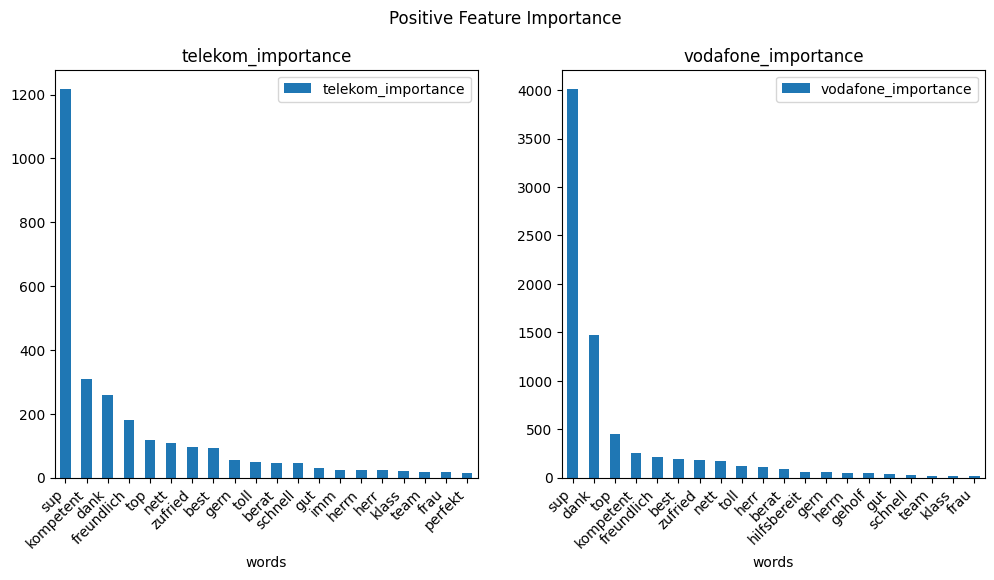

In [128]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
# plot first pandas frame in subplot style
feature_importance.iloc[:20].plot.bar(x='words', y='telekom_importance', rot=0,ax = axes[0],subplots=True, title=str("Positive Feature Importance"))
fig.autofmt_xdate(rotation=45)

# plot second pandas frame in subplot style
feature_importance_vf.iloc[:20].plot.bar(x='words', y='vodafone_importance', rot=0, ax = axes[1],subplots=True, title=str("Positive Feature Importance"))
fig.autofmt_xdate(rotation=45)

plt.show()

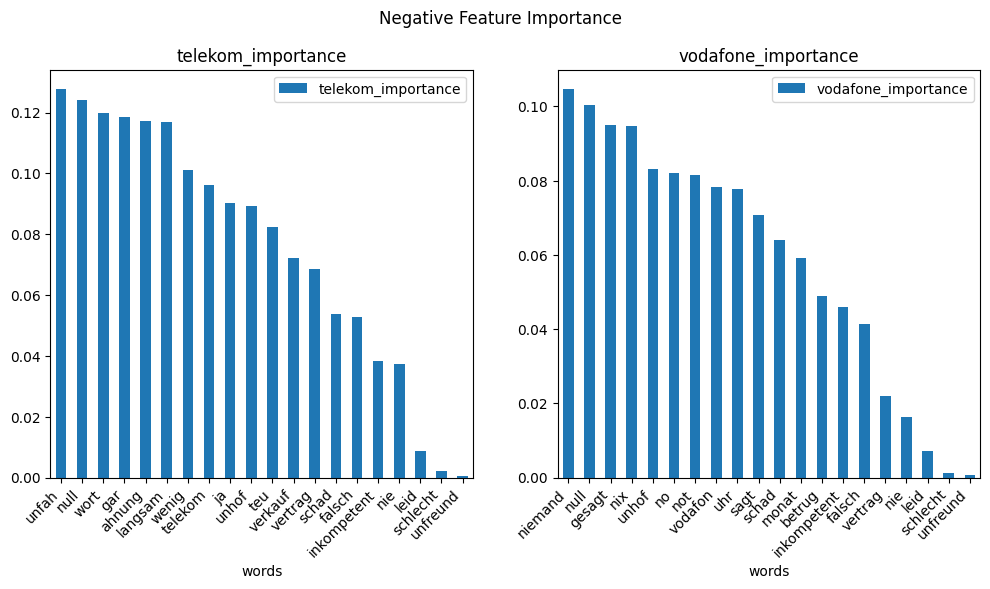

In [129]:
#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
# plot first pandas frame in subplot style
feature_importance.iloc[-20:].plot.bar(x='words', y='telekom_importance', rot=0,ax = axes[0],subplots=True, title=str("Negative Feature Importance"))
fig.autofmt_xdate(rotation=45)

# plot second pandas frame in subplot style
feature_importance_vf.iloc[-20:].plot.bar(x='words', y='vodafone_importance', rot=0, ax = axes[1],subplots=True, title=str("Negative Feature Importance"))
fig.autofmt_xdate(rotation=45)

plt.show()

### Analyse Telekom Failures

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [80]:
yt_test.value_counts()

Sentiment
1    4216
0     630
Name: count, dtype: int64

In [81]:
# Confusion matrix (rows - test classes, columns - predicted classes)
confusion_matrix(yt_test, preds_telekom)

array([[ 439,  191],
       [  24, 4192]])

In [82]:
f1_score(yt_test, preds_telekom, average="weighted")

0.952674941319359

In [83]:
# check errors - wrong predictions
cp = yt_test != preds_telekom
wrong_pred_idx = cp[cp==True].index.tolist()


In [84]:
df_failures = df_telekom_comments.loc[wrong_pred_idx, ["Comment", "rating_cleaned"]]
df_failures

,Comment,rating_cleaned
33623,Menschen die aus gesundheitlichen Gründen keine Maske tragen dürfen werden in diesem Markt nicht...,1
21576,"Keine nette Leute, die uns helfen können, obwohl ich selbst gehörlos bin. Traurig",1
1645,"Nettes und Kompetentes Personal, allerdings auch lange Wartezeit.",3
18430,Sollte in Peiting besser laufen. .,3
2905,Nicht zu empfehlen,1
16106,Ohne Termin lange Wartezeiten. Dafür aber eine sehr kompetente Beraterin. Frau Schübel ist auf Z...,3
20036,Geht so,3
8470,Bin nicht bei der Telekom,5
32697,Sve na jednom mjestu,5
9304,Verkäufer gut. ABER LEIDER NICHT ALLE HANDYS,5


In [85]:
df_telekom_comments.loc[wrong_pred_idx, "rating_cleaned"].value_counts()

rating_cleaned
1    99
3    63
2    29
5    15
4     9
Name: count, dtype: int64

In [86]:
df_failures[df_failures["rating_cleaned"]==5]

,Comment,rating_cleaned
8470,Bin nicht bei der Telekom,5
32697,Sve na jednom mjestu,5
9304,Verkäufer gut. ABER LEIDER NICHT ALLE HANDYS,5
30103,"Ich kann ohne schlechtes Gewissen sagen, dass mir kein besserer und fairerer Handyladen bekannt ...",5
828,ACHTUNG HACKER!!!\n\nIch habe mir eine SIM Karte von der Telekom gekauft da meine Eltern meinten...,5
28153,"Habe wegen einer Vertragsverlängerung, mit neuem Gerät, bei 5 anderen\nTelekom Läden nachgefragt...",5
10182,"Ein Laden in dem man nicht so lange warten muss, wie man leider bei einem Telekomladen gewohnt ist.",5
15571,"Die kennen sich wenigstens mit der Materie aus, auch wenns was teurer als die Konkurrenz ist. Da...",5
40118,Expert Pfaffenhofen hat einen wirklich mehr als unfähigen Kundendienst. Laut seiner Aussage ist ...,5
1324,Top Laden !\n\nZu der Bewertung von Frau Sturm möchte ich mal etwas anmerken....Ja Kunde ist Kön...,5


### Analyse Vodafone Failures

In [87]:
yv_test.value_counts()

Sentiment
1    4795
0     705
Name: count, dtype: int64

In [88]:
# Confusion matrix (rows - test classes, columns - predicted classes)
confusion_matrix(yv_test, preds_vodafone)

array([[ 510,  195],
       [  24, 4771]])

In [89]:
f1_score(yv_test, preds_vodafone, average="weighted")

0.9577828557284677

In [90]:
# check errors - wrong predictions
cp = yv_test != preds_vodafone
wrong_pred_idx = cp[cp==True].index.tolist()

In [91]:
df_vodafone_failures = df_vodafone_comments.loc[wrong_pred_idx, ["Comment", "rating_cleaned"]]
df_vodafone_failures

,Comment,rating_cleaned
37234,"Heute mal Glück gehabt, brauchte nicht zu warten",3
19560,"Ich war seit Jahren da als Kunde, aber seitdem der Personal gewechselt wurde habe ich nur mangel...",1
1105,"Ein Herr in diesem Shop ist sehr nett und zuvorkommend, doch leider bin ich trotz allem nicht ü...",1
4349,"Ich habe keine gute Erfahrung in dem Shop gemacht um bekam Leistungen gebucht, die überhaupt nic...",1
2737,selbst ein Stern ist noch viel zu viel für den Service von diesem Geschäft. Ich habe nun von ein...,1
11045,Hab ein besseres Angebot (günstiger) für meinen Handyvertrag bei Vodafone im Expert bekommen.,1
32407,Schlimm. Wir wurden weder begrüßt noch freundlich behandelt als wir eine Frage gestellt haben. E...,1
8940,Konnten leider nicht helfen da Probleme mit dem Kabelanschluss und dem Receiver bestehen und hie...,3
16265,"Lange Wartezeit, aber super professionelles Personal",3
11838,keine interesse mann ist nur call ya kunde das muss im call ya center machen na vielen dank ohne...,1


In [92]:
df_vodafone_failures.loc[wrong_pred_idx, "rating_cleaned"].value_counts()

rating_cleaned
1    117
3     54
2     24
5     14
4     10
Name: count, dtype: int64

In [93]:
df_vodafone_failures[df_vodafone_failures["rating_cleaned"]==5]

,Comment,rating_cleaned
12655,Vodafone messed up big time with a contract and had been taking money from my account for 1.5 ye...,5
2212,Boben Laden,5
23637,"Estava a procura de uma Internet para instalar no meu novo apartamento aqui em Hannover, então p...",5
25589,I have been a Vodafone user for a very long time and honestly wanted to switch to another operat...,5
14574,"Nach den Erfahrungen, die ich hier persönlich gemacht habe, kann ich diesen Shop nicht weiteremp...",5
31190,"买了一张手机卡，vodafone, 质量很好",5
31264,Mehr als 5 Sterne !:),5
11169,Ohne Worte...5 Sterne,5
13664,Ich habe mich noch nie so wohl gefühlt bei einem Gespräch mit Vodafone. Frau Rosier gibt sich se...,5
23033,"Heute bin ich bei Frau Wintermeyer gewesen. Sehr individueller Services, speziell und bei ihr so...",5


## 6. Conclusions

### Key Findings
- Dataset seems to be cropped after June 2022, but in general we see vodafone had better ratings before 2021 year
- Beginning of 2023 (January and March) Vodafone had similar ratings as Telekom
- From existing dataset it is hard to see differencies in comments (very similar topic patterns and common words)
- Low number of Comments/Ratings after June 2022, so it is hard to see most fresh differencies 
- Simple sentiment model can not detect well semantic meaning of the comment when positive and negative words occur together 
- Even simple sentiment model can perform well for major amount of comments -> potential to improve
### Next steps
- Do we have all data? Answer the question about what happened with data after June 2022
- For larger dataset analysis per City could be interesing
- Better Preprocessing will be needed (language detection, mixed languages in the comment, better stopwords)
- For the sentiment modeling: usage of transformers are needed, Bert alike: 
https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment (fine-tuned for sentiment analysis on product reviews, available in german)
